pr136_NNHOnly

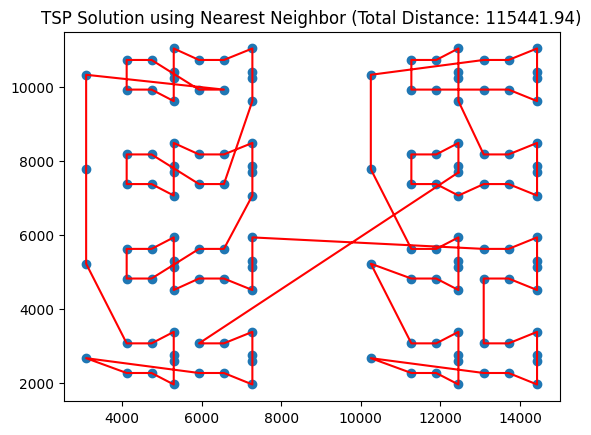

Time taken to render: 0.23498988151550293 seconds




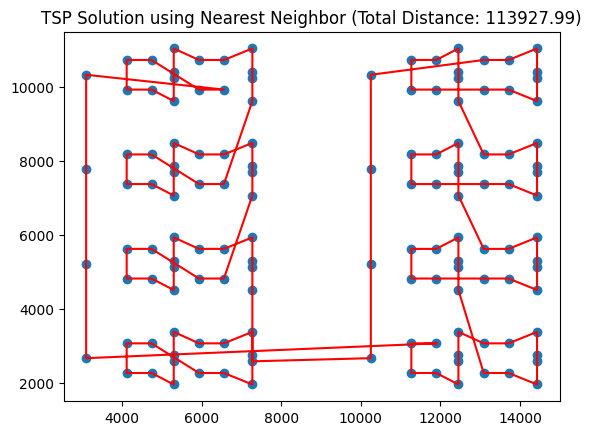

Time taken to render: 0.20684337615966797 seconds




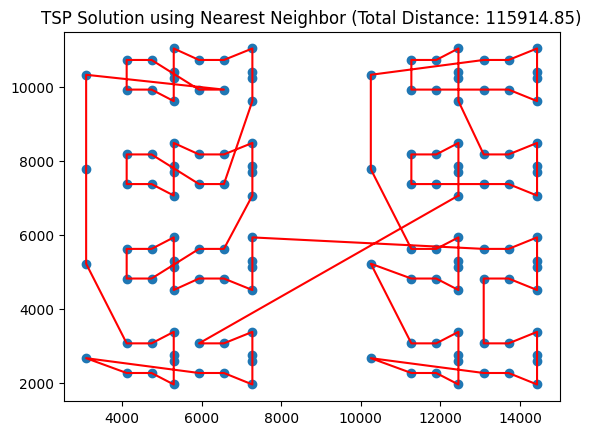

Time taken to render: 0.20122838020324707 seconds




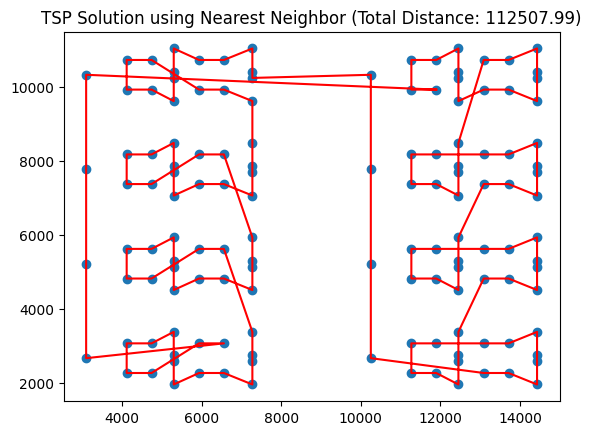

Time taken to render: 0.18577957153320312 seconds




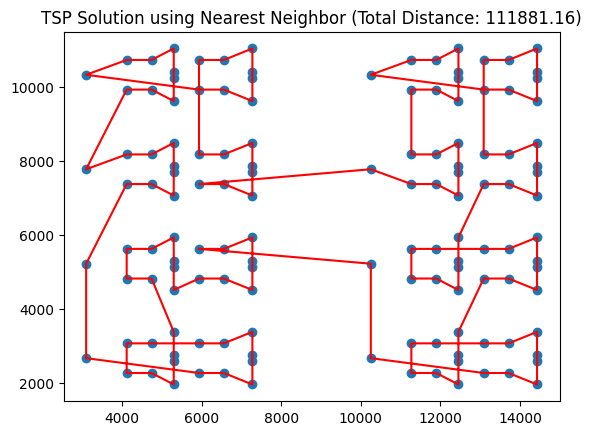

Time taken to render: 0.22620511054992676 seconds




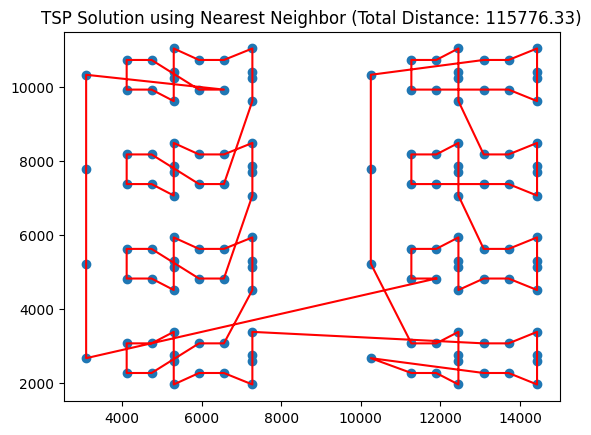

Time taken to render: 0.1886887550354004 seconds




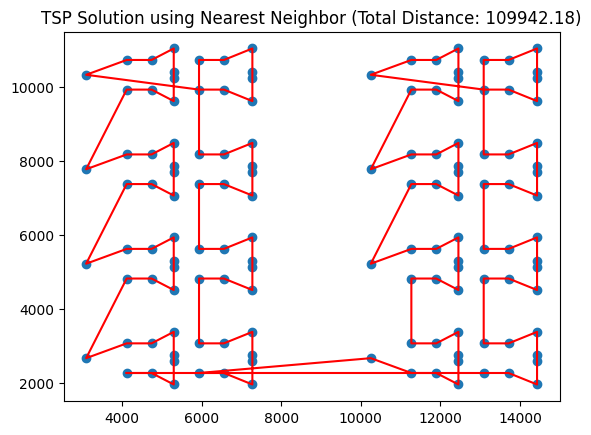

Time taken to render: 0.1871812343597412 seconds




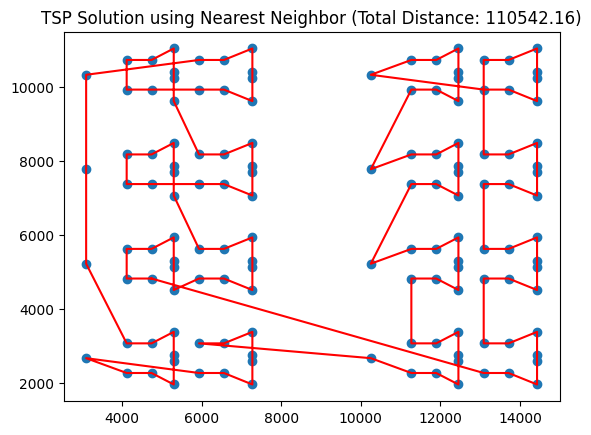

Time taken to render: 0.181976318359375 seconds




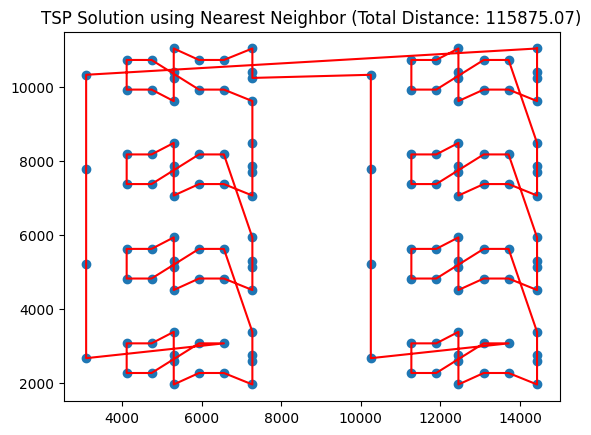

Time taken to render: 0.1934504508972168 seconds




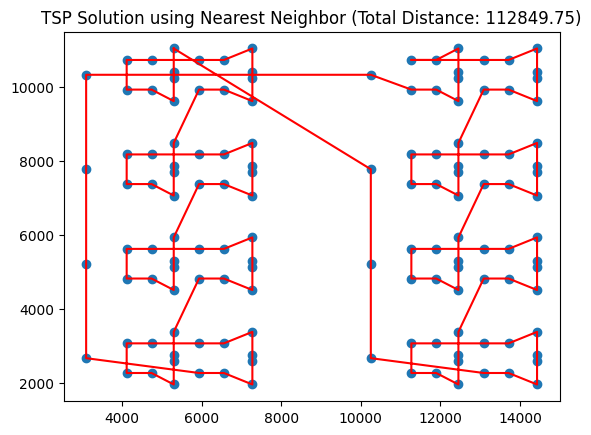

Time taken to render: 0.1892566680908203 seconds


Average Tour Length: 113465.9415184251
Time taken to render: 0.19025421142578125 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "pr136.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


pr136_NNHWith2OPT

Iteration 797: Improved total distance to 113540.30
Iteration 1912: Improved total distance to 113468.90
Iteration 3798: Improved total distance to 112998.19
Iteration 5310: Improved total distance to 112527.48
Iteration 5318: Improved total distance to 111996.73
Iteration 6272: Improved total distance to 111574.51
Iteration 6782: Improved total distance to 111031.85
Iteration 6969: Improved total distance to 110416.47
Iteration 7277: Improved total distance to 110407.76
Iteration 7562: Improved total distance to 109697.42
Iteration 7784: Improved total distance to 109425.39
Iteration 7873: Improved total distance to 108810.01
Iteration 8101: Improved total distance to 108801.30
Iteration 8306: Improved total distance to 108090.97
Iteration 8464: Improved total distance to 107818.93
Iteration 8521: Improved total distance to 107203.55
Iteration 8669: Improved total distance to 107194.85
Iteration 8794: Improved total distance to 106484.51
Iteration 8950: Improved total distance to 1060

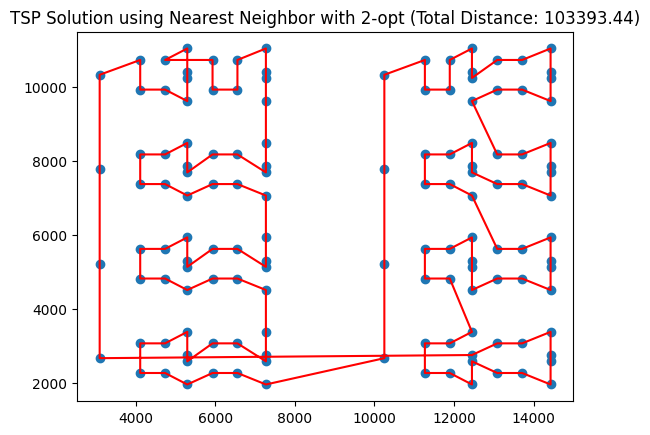

Time taken to render: 37.14157462120056 seconds


Iteration 273: Improved total distance to 116869.64
Iteration 1422: Improved total distance to 115990.68
Iteration 2038: Improved total distance to 115718.64
Iteration 2263: Improved total distance to 115103.26
Iteration 2831: Improved total distance to 115094.56
Iteration 3376: Improved total distance to 114384.22
Iteration 3806: Improved total distance to 114112.19
Iteration 3999: Improved total distance to 113496.81
Iteration 4487: Improved total distance to 113488.10
Iteration 4952: Improved total distance to 112777.76
Iteration 5652: Improved total distance to 112332.80
Iteration 5809: Improved total distance to 111717.42
Iteration 5813: Improved total distance to 111259.44
Iteration 5887: Improved total distance to 111250.74
Iteration 6198: Improved total distance to 110649.68
Iteration 6782: Improved total distance to 110107.02
Iteration 6969: Improved total distance to 109491.64
Iteration 7277: Improved total distance to 109482.

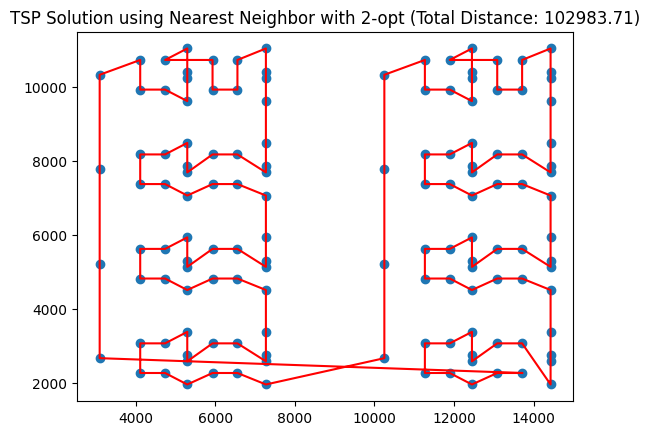

Time taken to render: 32.54910349845886 seconds


Iteration 66: Improved total distance to 111271.19
Iteration 539: Improved total distance to 110518.88
Iteration 801: Improved total distance to 110048.41
Iteration 920: Improved total distance to 110047.88
Iteration 2502: Improved total distance to 109687.93
Iteration 3059: Improved total distance to 109217.46
Iteration 4206: Improved total distance to 108857.50
Iteration 4683: Improved total distance to 108387.03
Iteration 6421: Improved total distance to 107754.65
Iteration 8233: Improved total distance to 106879.75
Iteration 8310: Improved total distance to 106673.32
Iteration 8383: Improved total distance to 106106.92
Iteration 8460: Improved total distance to 105962.01
Iteration 8696: Improved total distance to 105304.74
Iteration 9095: Improved total distance to 104916.95
Iteration 9100: Improved total distance to 104595.31
Iteration 9313: Improved total distance to 104173.09
Iteration 9367: Improved total distance to 104124.11
I

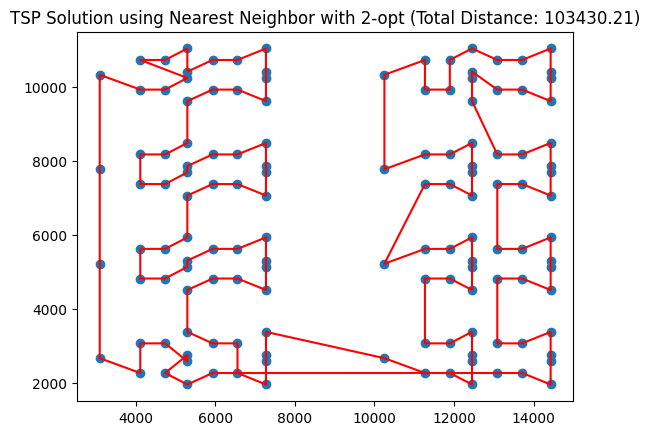

Time taken to render: 32.3150532245636 seconds


Iteration 1474: Improved total distance to 114352.84
Iteration 3272: Improved total distance to 114005.76
Iteration 4098: Improved total distance to 113998.12
Iteration 4394: Improved total distance to 113875.52
Iteration 6421: Improved total distance to 112015.68
Iteration 6491: Improved total distance to 111593.46
Iteration 7221: Improved total distance to 110969.37
Iteration 7974: Improved total distance to 110524.40
Iteration 8059: Improved total distance to 109909.03
Iteration 8063: Improved total distance to 109451.05
Iteration 8101: Improved total distance to 109442.34
Iteration 8268: Improved total distance to 108841.29
Iteration 8753: Improved total distance to 107966.38
Iteration 8798: Improved total distance to 107759.95
Iteration 8839: Improved total distance to 107193.56
Iteration 8884: Improved total distance to 107048.64
Iteration 8992: Improved total distance to 106391.38
Iteration 11986: Improved total distance to 106305

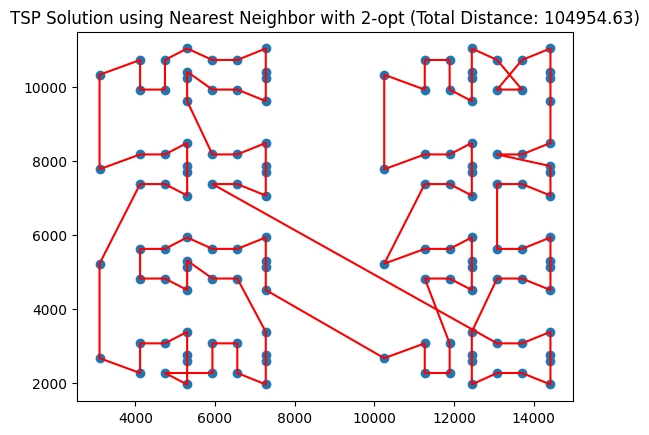

Time taken to render: 30.647955179214478 seconds


Iteration 66: Improved total distance to 111271.19
Iteration 539: Improved total distance to 110518.88
Iteration 801: Improved total distance to 110048.41
Iteration 920: Improved total distance to 110047.88
Iteration 2502: Improved total distance to 109687.93
Iteration 3059: Improved total distance to 109217.46
Iteration 4206: Improved total distance to 108857.50
Iteration 4683: Improved total distance to 108387.03
Iteration 6421: Improved total distance to 107754.65
Iteration 8233: Improved total distance to 106879.75
Iteration 8310: Improved total distance to 106673.32
Iteration 8383: Improved total distance to 106106.92
Iteration 8460: Improved total distance to 105962.01
Iteration 8696: Improved total distance to 105304.74
Iteration 9095: Improved total distance to 104916.95
Iteration 9100: Improved total distance to 104595.31
Iteration 9313: Improved total distance to 104173.09
Iteration 9367: Improved total distance to 104124.11


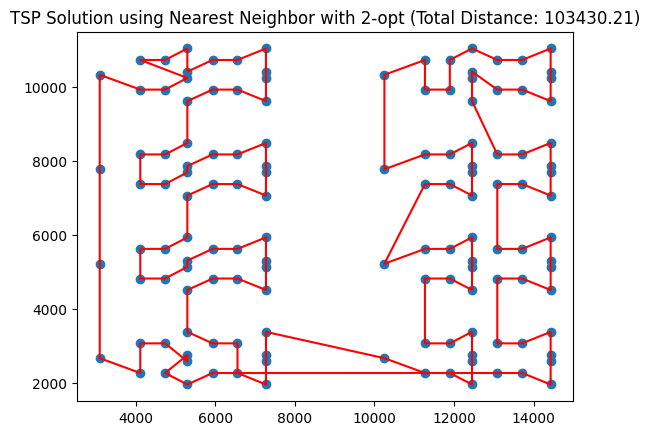

Time taken to render: 27.723124742507935 seconds


Average Tour Length: 103638.44204075752
Time taken to render: 27.723124742507935 seconds


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "pr136.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(5):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


pr136_NNHWith3OPT

Iteration 195: Improved total distance to 111445.48
Iteration 13522: Improved total distance to 111233.01
Iteration 26753: Improved total distance to 110916.82
Iteration 245024: Improved total distance to 109980.79
Iteration 329961: Improved total distance to 109492.48
Iteration 350544: Improved total distance to 109176.23
Iteration 391476: Improved total distance to 108395.58


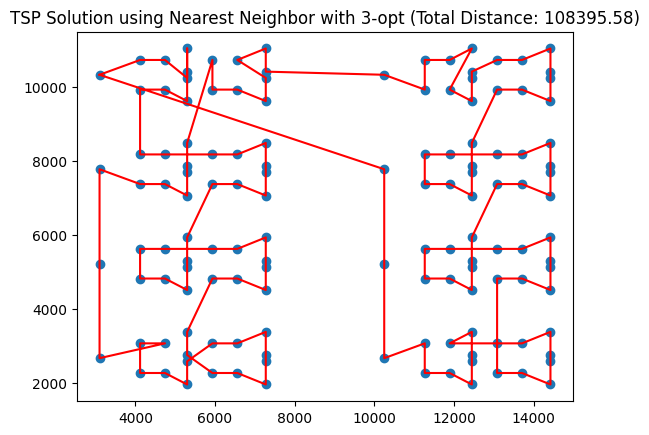

Time taken to render: 81.77360105514526 seconds


Iteration 2382: Improved total distance to 114976.26
Iteration 34329: Improved total distance to 114898.40
Iteration 34453: Improved total distance to 114508.55
Iteration 246721: Improved total distance to 114208.85
Iteration 356079: Improved total distance to 113339.51
Iteration 387622: Improved total distance to 111952.48
Iteration 389168: Improved total distance to 111698.92
Iteration 466419: Improved total distance to 111666.55
Iteration 632365: Improved total distance to 110090.51
Iteration 769963: Improved total distance to 109221.17
Iteration 827128: Improved total distance to 109099.00
Iteration 835004: Improved total distance to 108484.42
Iteration 1085139: Improved total distance to 107678.77
Iteration 1417070: Improved total distance to 107616.05
Iteration 1442848: Improved total distance to 107000.67
Iteration 1483105: Improved total distance to 106503.91
Iteration 1566021: Improved total distance to 106176.83


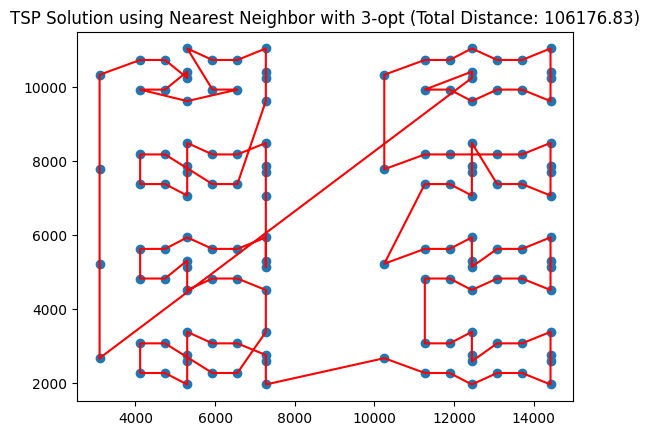

Time taken to render: 208.3940932750702 seconds


Iteration 1189: Improved total distance to 110108.66
Iteration 300288: Improved total distance to 108721.64
Iteration 330030: Improved total distance to 108234.70
Iteration 374791: Improved total distance to 108024.19
Iteration 391672: Improved total distance to 106997.47
Iteration 740675: Improved total distance to 106885.79
Iteration 802358: Improved total distance to 106170.62
Iteration 1014661: Improved total distance to 105618.77
Iteration 1171295: Improved total distance to 105408.26


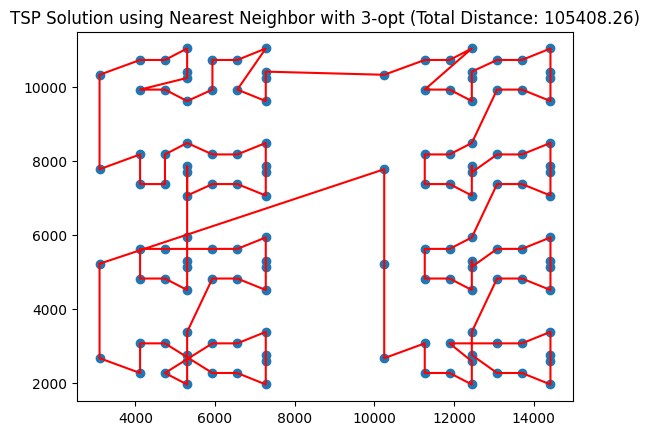

Time taken to render: 174.6477656364441 seconds


Average Tour Length: 106660.22152655793
Time taken to render: 174.64876580238342 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "pr136.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")
